In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [46]:
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']

In [48]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [51]:
x_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [52]:
DT=DecisionTreeClassifier(criterion="entropy",max_depth=5)
DT.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [53]:
y_pred=DT.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [54]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[83, 16],
       [17, 38]])

In [55]:
acc=accuracy_score(y_test,y_pred)
print(f"accuracy score for DT {acc}")

accuracy score for DT 0.7857142857142857


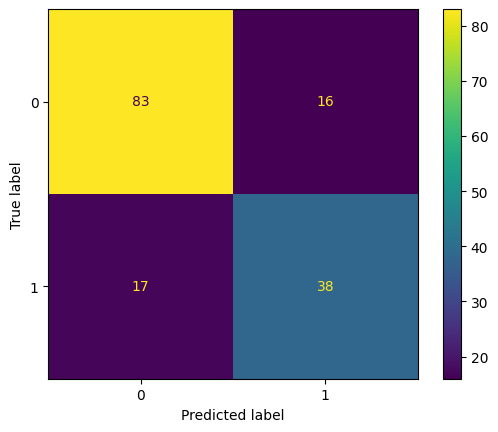

In [56]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [57]:
from sklearn import tree
feature_names = list(df.columns.drop('Outcome'))
class_names = ['No Diabetes', 'Diabetes']

dot_data =tree.export_graphviz(  DT,  feature_names=feature_names, class_names=class_names, filled=True, rounded=True)


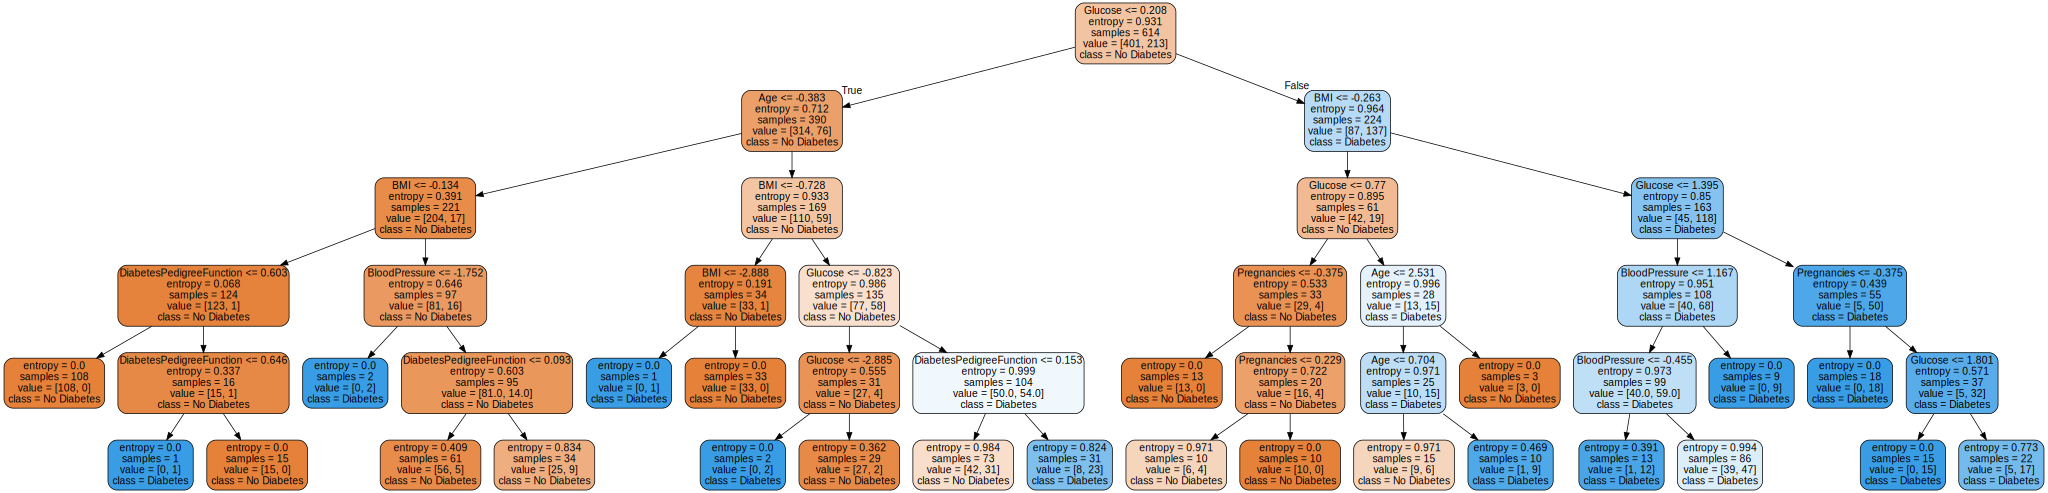

In [58]:
import graphviz
graph=graphviz.Source(dot_data)

graph

In [59]:
from sklearn.neighbors import KNeighborsClassifier
bagging=BaggingClassifier(estimator=KNeighborsClassifier(),  n_estimators=10,max_samples=0.8,random_state=42)

In [60]:
bagging.fit(x_train,y_train)


BaggingClassifier(estimator=KNeighborsClassifier(), max_samples=0.8,
                  random_state=42)

In [61]:
y1_pred=bagging.predict(x_test)

In [62]:
acc1=accuracy_score(y_test,y1_pred)
print(f"accuracy score for bagging {acc1}")


accuracy score for bagging 0.6753246753246753


In [63]:
cm1=confusion_matrix(y_test,y1_pred)
cm1

array([[78, 21],
       [29, 26]])

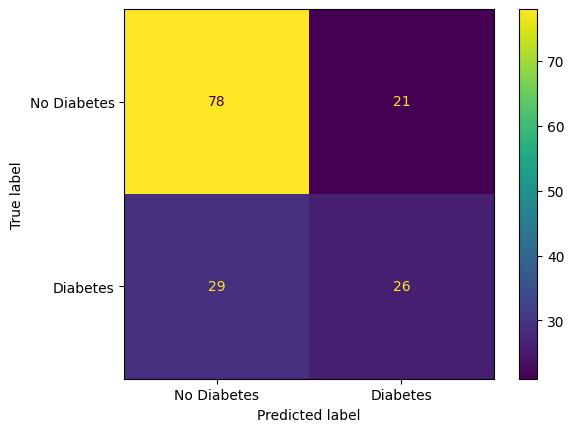

In [64]:
display=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=class_names)
display.plot()

In [65]:
R_Forest=RandomForestClassifier(
    n_estimators=7,
    max_depth=4,
    max_samples=0.8,
    max_features=0.8,
    random_state=0
)
R_Forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=0.8, max_samples=0.8,
                       n_estimators=7, random_state=0)

In [66]:
y2_pred=R_Forest.predict(x_test)

In [67]:
acc2=accuracy_score(y_test,y2_pred)
print(f"accuracy score for random forest {acc2}")

accuracy score for random forest 0.7207792207792207


In [68]:
cm2=confusion_matrix(y_test,y2_pred)
cm2

array([[74, 25],
       [18, 37]])

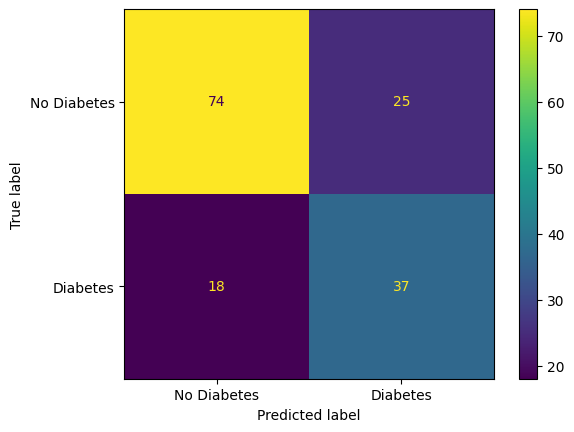

In [69]:
display2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=class_names)
display2.plot()